<a href="https://colab.research.google.com/github/harryge/DSprojects/blob/main/Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
distance=[10,15,17,26]
time=[0.2,0.55,1.3,0.27]

In [ ]:
type(time)
type(distance)

list

In [ ]:
distance_arr=np.array(distance)
time_arr=np.array(time)

In [ ]:
type(distance_arr)

numpy.ndarray

In [ ]:
#calculating the speed
speed=distance_arr/time_arr
speed

array([50.        , 27.27272727, 13.07692308, 96.2962963 ])

#Context
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Content
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute

In [29]:
# importing the supporting libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [30]:
#loading the dataset
df=pd.read_csv('/Automobile_data.csv')

In [31]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [32]:
#columns in the dataset
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [33]:
#shape of the dataset to display number of rows and columns
df.shape

(205, 26)

In [34]:
# displaying the last five rows of the data
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [35]:
#checking for null values
df.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [36]:
#getting summary statistics of all the numerical values of the dataset\
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Missing value detection and treatment

In [37]:
# checking the datatypes of the columns 
# count of records in each column of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [38]:
# checking whether the continous variables have missing values which could be represented by '0'
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


### None of the continous variables have missing values reprsented by zero. We can also see that there are 11 continuous variables, but the decribe table has 10 variables. This is because column 'Normalized losses' has missing values.

In [39]:
# Treating missing values in the normalized losses column
from numpy import nan
df['normalized-losses']=df['normalized-losses'].replace('?',np.nan)

In [40]:
# checking whether the ? has been replaced with nan
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


From the table above, we can see that the normalized-losses column ? had been replaced with nan

In [41]:
# checking again for missing values
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Normalized-losses column has 41 missing values. The code below is a visual representation of the missing values in the dataset

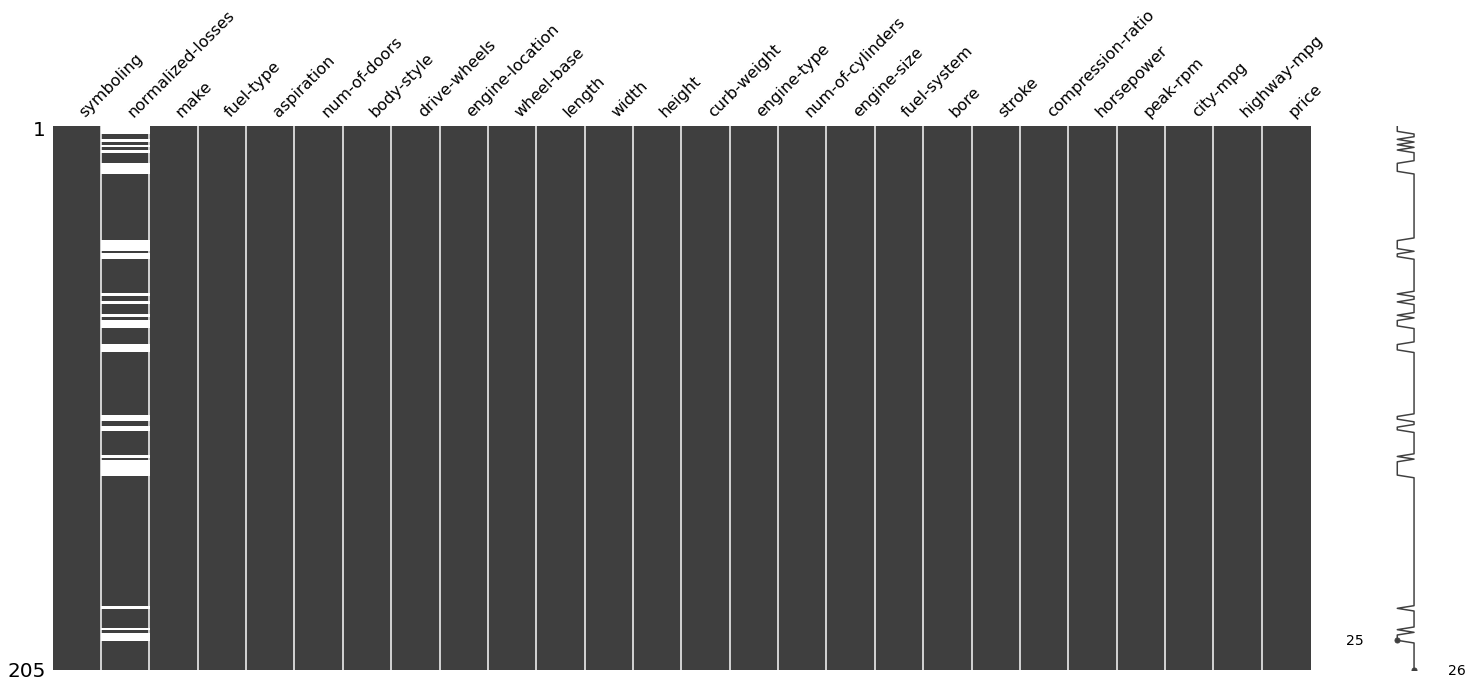

In [42]:
import missingno as mn
mn.matrix(df)

The white spaces in the columns are an indication of missing values in the dataset

In [43]:
# we impute the missing values in the column normalized-losses using median
# we use median becuase it is least affected by outliers
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


symboling               1.0
normalized-losses     115.0
wheel-base             97.0
length                173.2
width                  65.5
height                 54.1
curb-weight          2414.0
engine-size           120.0
compression-ratio       9.0
city-mpg               24.0
highway-mpg            30.0
dtype: float64

In [45]:

# imputing the missing values
df.fillna(df.median(),inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [47]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We need to change the datatype of the normalized-losses from object float. The code below does that

In [49]:
df['normalized-losses']=pd.to_numeric(df['normalized-losses'],downcast='float')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float32
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

From the display above, we have managed to convert the datatype of the normalized-losses from object to float for ease of analysis and manipulation

# Outlier detection and treatment

Boxplots are a great way to detect outliers in any data. Once outliers have been detected, they can be imputed with the 5th and 95th percentile

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

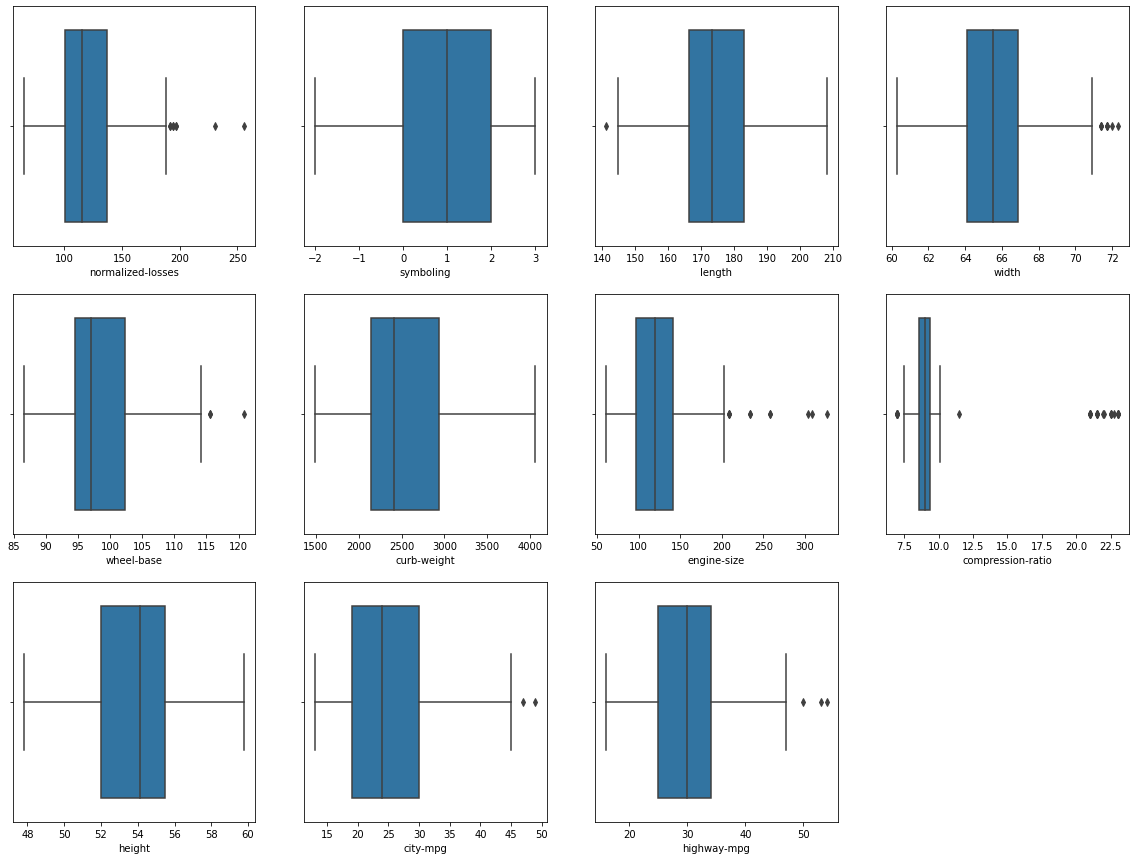

In [54]:
plt.figure(figsize=(20,15))
plt.subplot(3,4,1)
sns.boxplot(df['normalized-losses'])

plt.subplot(3,4,2)
sns.boxplot(df['symboling'])

plt.subplot(3,4,3)
sns.boxplot(df['length'])

plt.subplot(3,4,4)
sns.boxplot(df['width'])

plt.subplot(3,4,5)
sns.boxplot(df['wheel-base'])

plt.subplot(3,4,6)
sns.boxplot(df['curb-weight'])

plt.subplot(3,4,7)
sns.boxplot(df['engine-size'])

plt.subplot(3,4,8)
sns.boxplot(df['compression-ratio'])

plt.subplot(3,4,9)
sns.boxplot(df['height'])

plt.subplot(3,4,10)
sns.boxplot(df['city-mpg'])

plt.subplot(3,4,11)
sns.boxplot(df['highway-mpg'])

In [55]:
# we use the clip fucntion to impute the outliers using the 5th and 95th percentile
df['normalized-losses']=df['normalized-losses'].clip(lower=df['normalized-losses'].quantile(0.05 ),upper=df['normalized-losses'].quantile(0.95))
df['highway-mpg']=df['highway-mpg'].clip(lower=df['highway-mpg'].quantile(0.05 ),upper=df['highway-mpg'].quantile(0.95))
df['city-mpg']=df['city-mpg'].clip(lower=df['city-mpg'].quantile(0.05 ),upper=df['city-mpg'].quantile(0.95))
df['engine-size']=df['engine-size'].clip(lower=df['engine-size'].quantile(0.05 ),upper=df['engine-size'].quantile(0.95))
df['compression-ratio']=df['compression-ratio'].clip(lower=df['compression-ratio'].quantile(0.05 ),upper=df['compression-ratio'].quantile(0.95))
df['wheel-base']=df['wheel-base'].clip(lower=df['wheel-base'].quantile(0.05 ),upper=df['wheel-base'].quantile(0.95))
df['width']=df['width'].clip(lower=df['width'].quantile(0.05 ),upper=df['width'].quantile(0.95))
df['length']=df['length'].clip(lower=df['length'].quantile(0.05 ),upper=df['length'].quantile(0.95))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

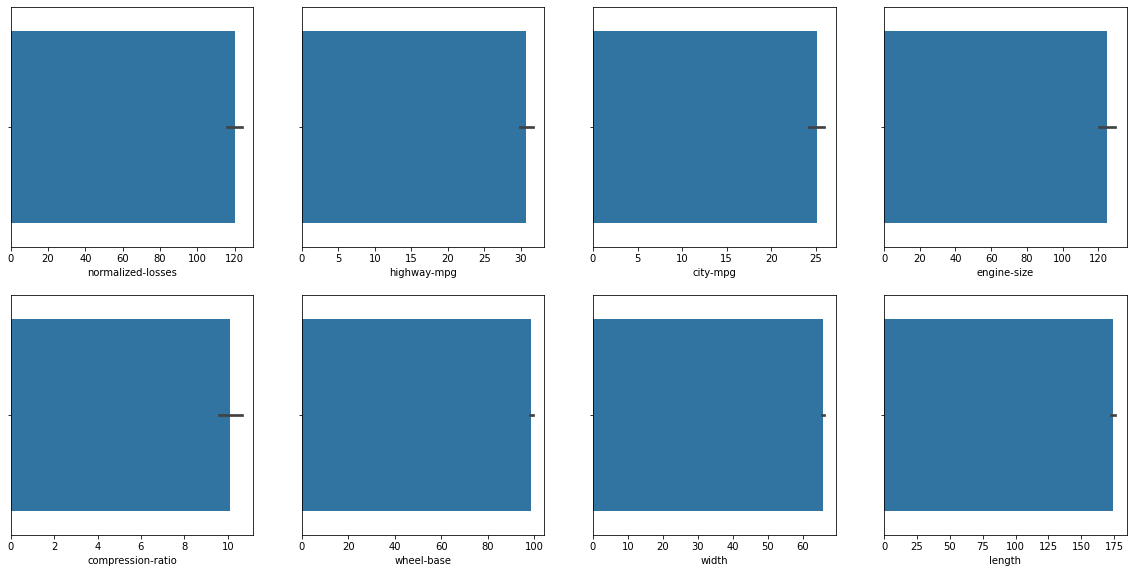

In [56]:
# confirming that we have dealt with the outlier values
plt.figure(figsize=(20,15))
plt.subplot(3,4,1)
sns.barplot(df['normalized-losses'])

plt.subplot(3,4,2)
sns.barplot(df['highway-mpg'])

plt.subplot(3,4,3)
sns.barplot(df['city-mpg'])

plt.subplot(3,4,4)
sns.barplot(df['engine-size'])

plt.subplot(3,4,5)
sns.barplot(df['compression-ratio'])

plt.subplot(3,4,6)
sns.barplot(df['wheel-base'])

plt.subplot(3,4,7)
sns.barplot(df['width'])

plt.subplot(3,4,8)
sns.barplot(df['length'])

From the diagram above we can see that the columns with outliers have been normalized and the data is in shape now

# Data Visualization

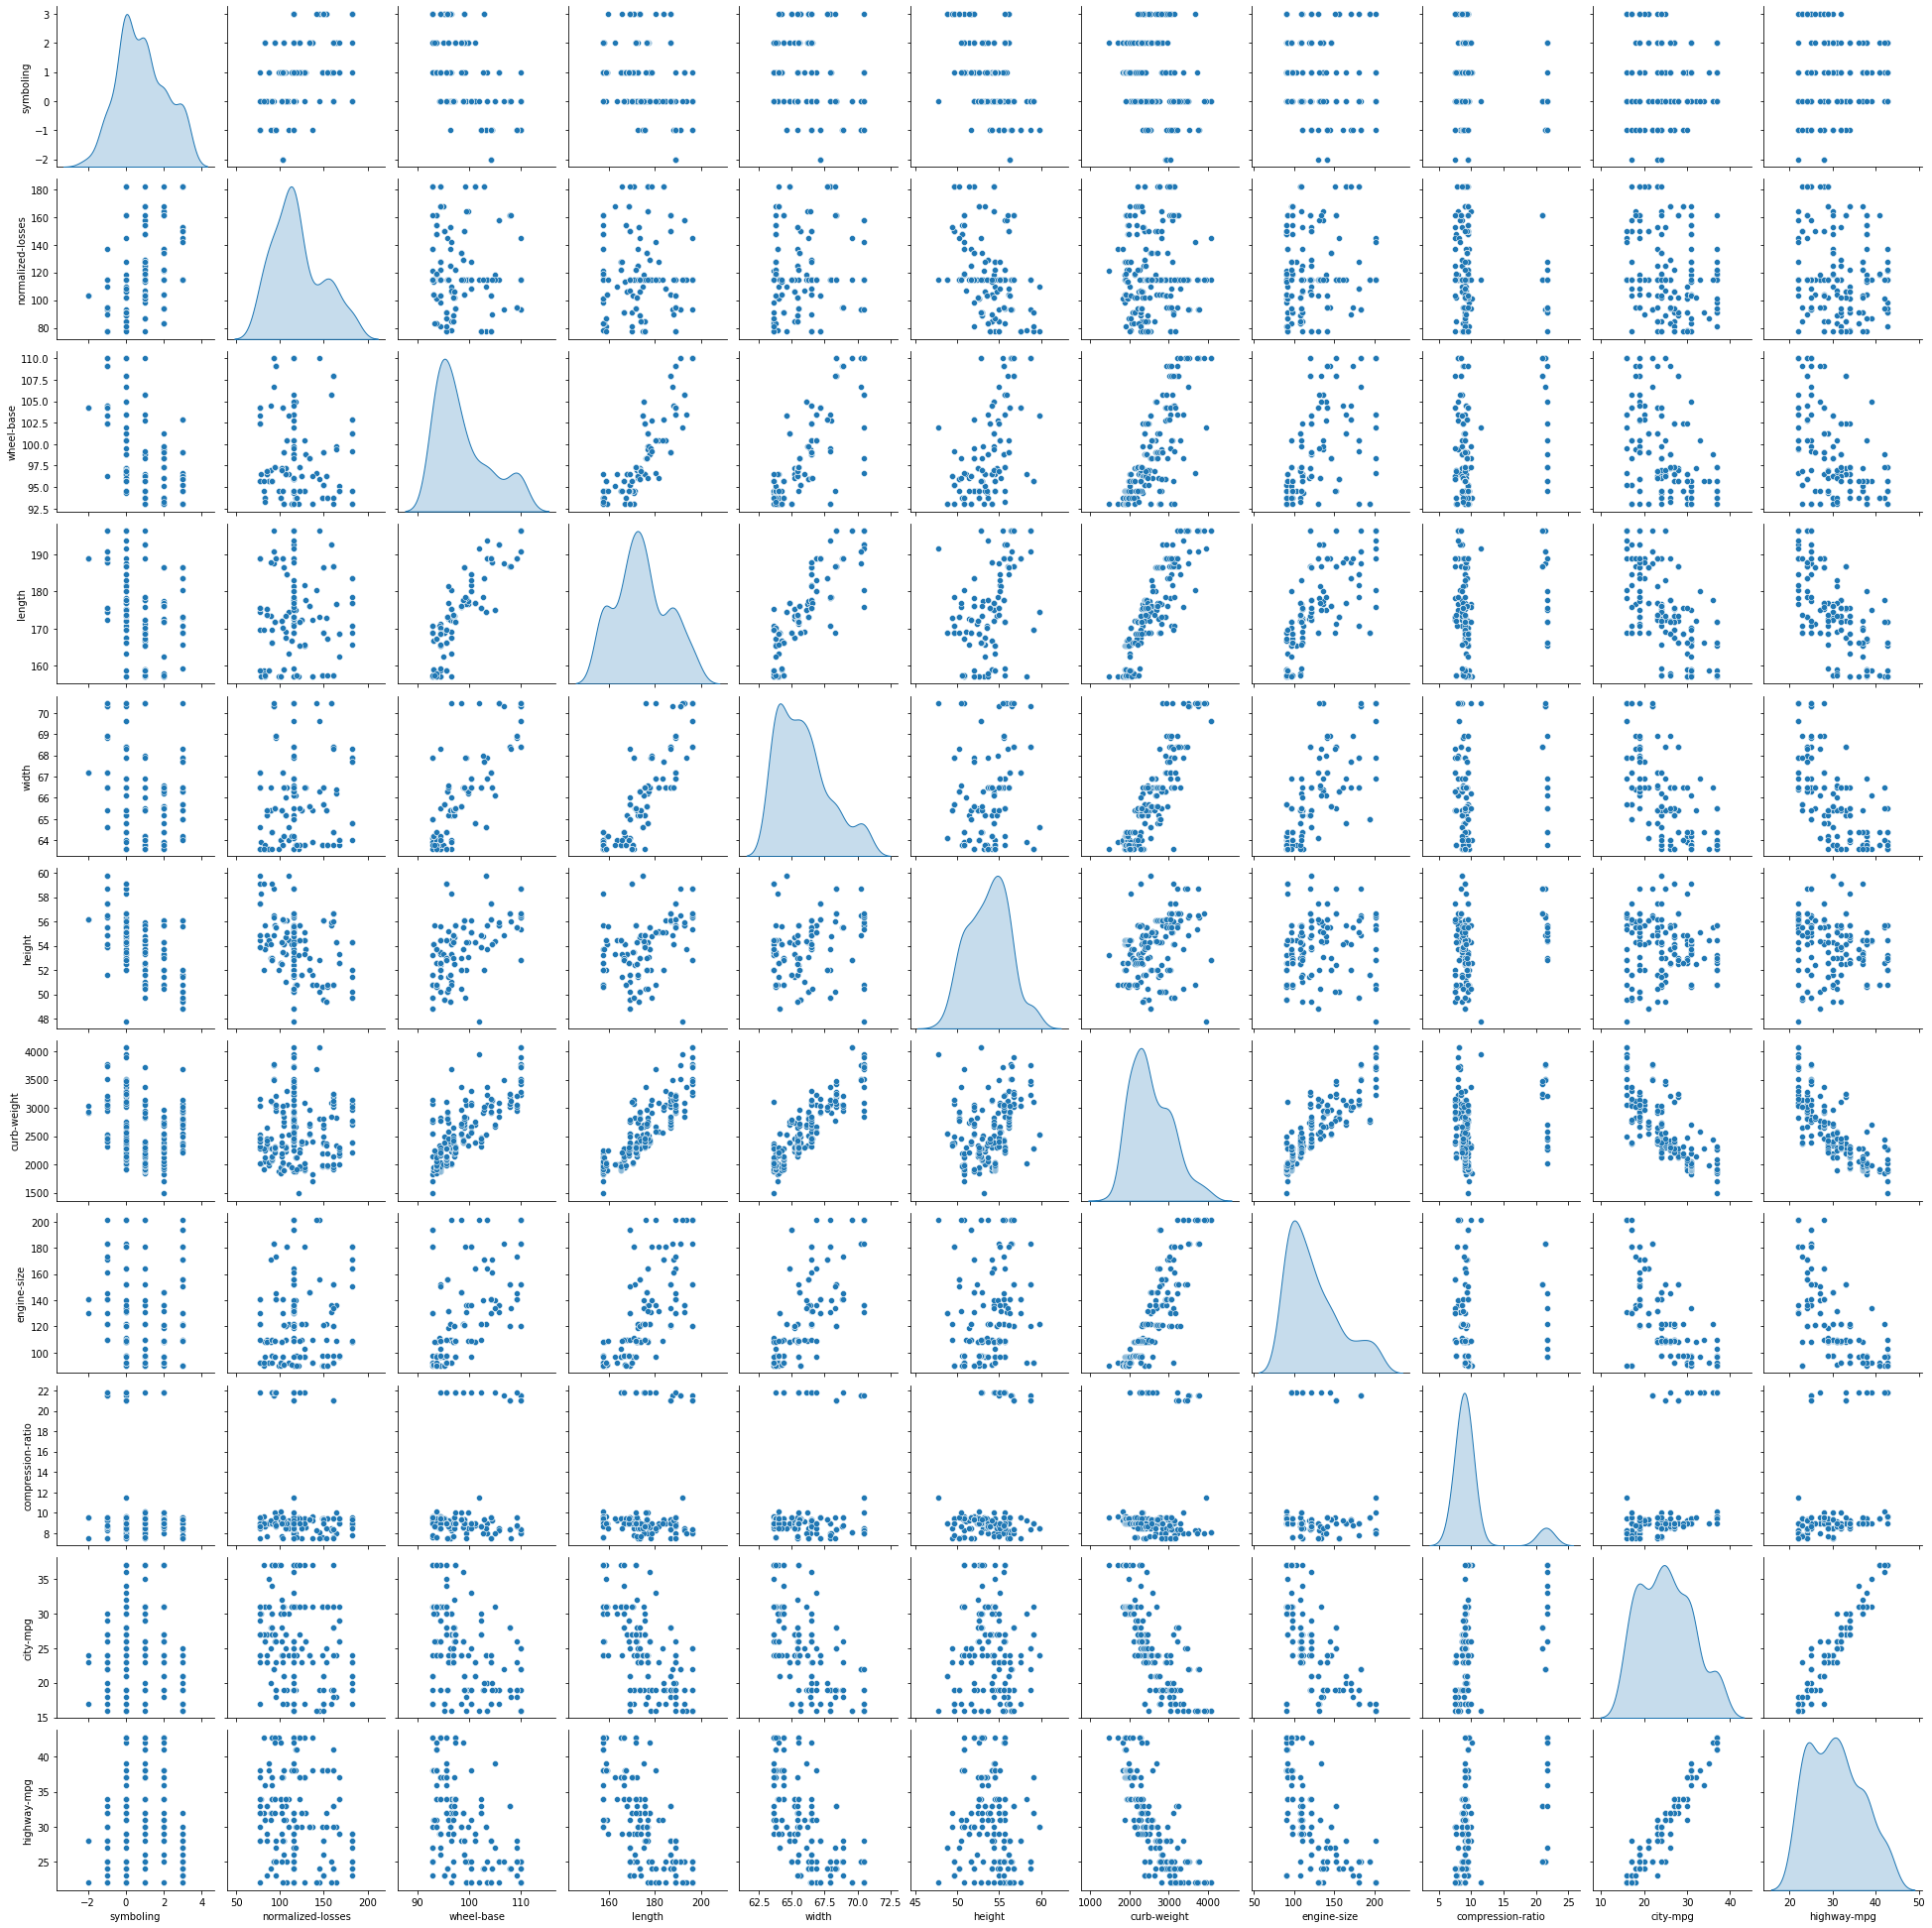

In [58]:
sns.pairplot(df,diag_kind='kde')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


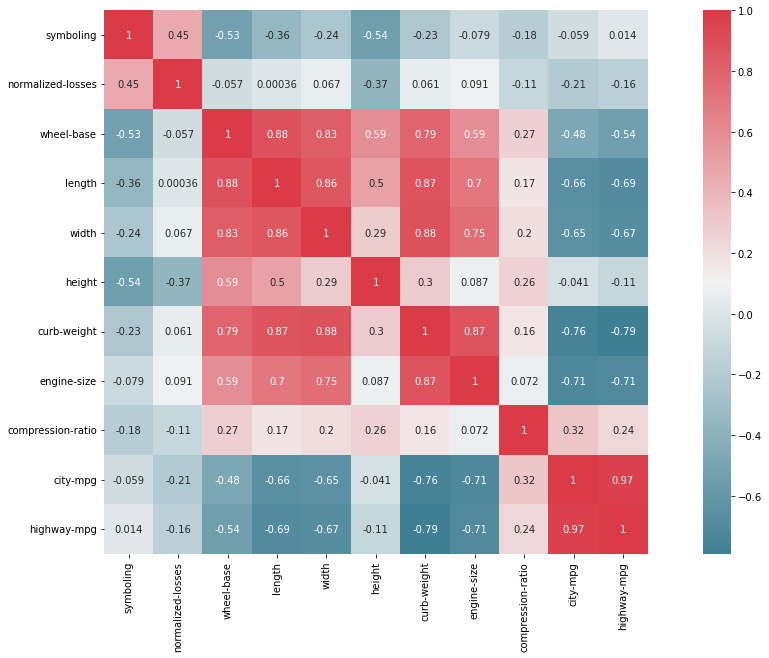

In [59]:
# checking for correlation among the variables
f,ax=plt.subplots(figsize=(20,10))
corr=df.corr("pearson")
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),
            square=True,ax=ax,annot=True)


The above heatmap shows multiple collinearity among the variables

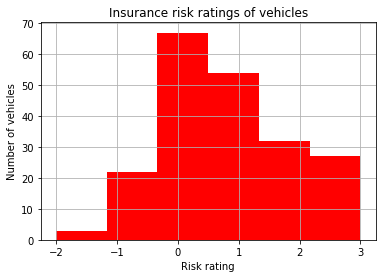

In [60]:
df.symboling.hist(bins=6,color='red')
plt.title("Insurance risk ratings of vehicles")
plt.xlabel('Risk rating')
plt.ylabel('Number of vehicles')
plt.show()

Text(0, 0.5, 'Number of vehicles')

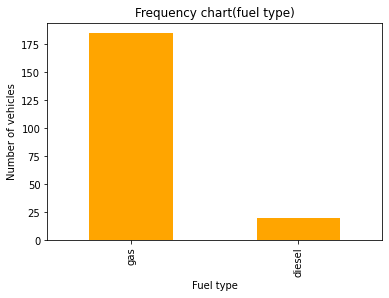

In [61]:
# understanding the fuel-type commonly used by vehicles
df['fuel-type'].value_counts().plot(kind='bar',color='Orange')
plt.title("Frequency chart(fuel type)")
plt.xlabel("Fuel type")
plt.ylabel("Number of vehicles")

We can see from the chart above that majority of the cars use gas as their fuel type

# Data Preprocessing

In [66]:
#label encoding of categorical variables 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['body-style']=labelencoder.fit_transform(df['body-style'])

In [67]:
df['body-style'].head(10)

0    0
1    0
2    2
3    3
4    3
5    3
6    3
7    4
8    3
9    2
Name: body-style, dtype: int64

The body-style has been coverted into numericals between 0>1>2>3>4.The challenge with labelencoder is that it may confuse the model to think that the values encoded as 4 have more importance or are greater than the values encoded as 0. Due to the effect above, we introduce one hot encoding to deal with the challenge above

In [77]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown='ignore')
#df['body-style']=enc.fit_transform(df[['body-style']]).toarray()
enc_df=pd.DataFrame(enc.fit_transform(df[['body-style']]).toarray())

In [78]:
# data after one hot encoding
enc_df

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
200,1.0,0.0
201,1.0,0.0
202,1.0,0.0
203,1.0,0.0
